<a href="https://colab.research.google.com/github/RafaelSdeSouza/astrostats-2025/blob/main/mlp_spiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install numpy pandas sklearn matplotlib

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(123)

# Generate two classes of multivariate normal data
Class1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
Class2 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], 100)

In [ ]:
# Combine data and create a binary response variable
data = np.vstack((Class1, Class2))
Class = np.hstack((np.repeat(0, 100), np.repeat(1, 100)))  # 0 for "M", 1 for "R"

# Create a dataframe
df = pd.DataFrame(data, columns=['V1', 'V2'])
df['Class'] = Class

In [ ]:
# Train the model
model = MLPClassifier(hidden_layer_sizes=(1), learning_rate_init=0.01, max_iter=500)
model.fit(df[['V1', 'V2']], df['Class'])

# Generate a grid over the feature space
x_min, x_max = df['V1'].min() - .5, df['V1'].max() + .5
y_min, y_max = df['V2'].min() - .5, df['V2'].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Compute the predictions across the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


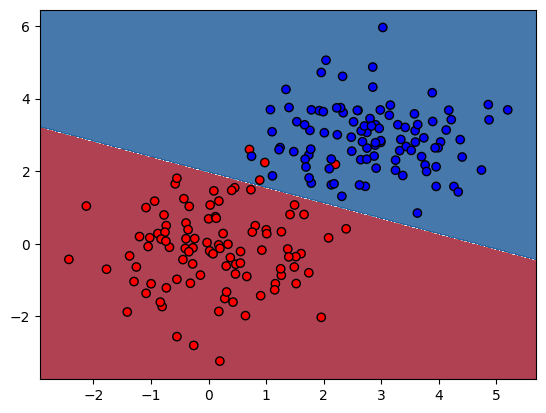

In [ ]:
# Plot the decision boundary
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(df['V1'], df['V2'], c=df['Class'], cmap=cm_bright, edgecolors='k')
plt.show()

In [ ]:
def generate_spiral(n_points, noise=1.0):
    n = n_points // 2
    dt = np.dtype([('x', np.float), ('y', np.float), ('label', np.int)])
    data = np.zeros(n * 2, dtype=dt)

    t = np.linspace(0, 4 * np.pi, n)
    r = t
    dx = r * np.cos(t) + np.random.normal(scale=noise, size=n)
    dy = r * np.sin(t) + np.random.normal(scale=noise, size=n)
    data['x'][:n] = dx
    data['y'][:n] = dy
    data['label'][:n] = 0

    dx = -r * np.cos(t) + np.random.normal(scale=noise, size=n)
    dy = -r * np.sin(t) + np.random.normal(scale=noise, size=n)
    data['x'][n:] = dx
    data['y'][n:] = dy
    data['label'][n:] = 1

    return pd.DataFrame(data)

# Generate the spiral data
np.random.seed(123)
data = generate_spiral(1000, noise=0.2)

# Prepare the input features and target variable
X = data[['x', 'y']]
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = MLPClassifier(hidden_layer_sizes=(15, 10), learning_rate_init=0.01, max_iter=500)
model.fit(X_train_scaled, y_train)

# Evaluate the model
print('Training accuracy:', model.score(X_train_scaled, y_train))
print('Testing accuracy:', model.score(X_test_scaled, y_test))

<ipython-input-10-cd2dc316e8ca>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dt = np.dtype([('x', np.float), ('y', np.float), ('label', np.int)])
<ipython-input-10-cd2dc316e8ca>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprec

Training accuracy: 0.995
Testing accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


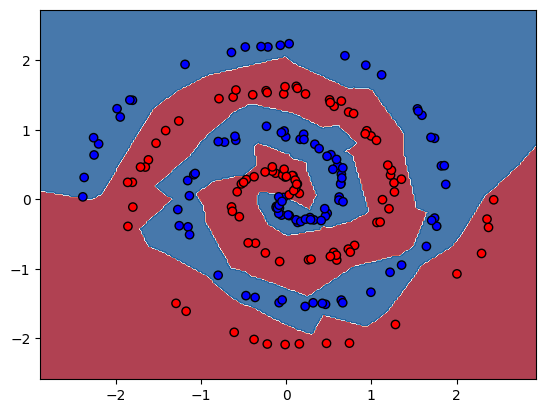

In [ ]:
# Plot the decision boundary
xx, yy = np.meshgrid(np.arange(X_test_scaled[:, 0].min() - .5, X_test_scaled[:, 0].max() + .5, .02),
                     np.arange(X_test_scaled[:, 1].min() - .5, X_test_scaled[:, 1].max() + .5, .02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=cm_bright, edgecolors='k')
plt.show()

In [ ]:
def plot_data_and_decision_boundary(df, model, x1, x2, title):
    # Create a mesh grid for our plot
    h = 0.02  # Mesh size
    x_min, x_max = df[x1].min() - 1, df[x1].max() + 1
    y_min, y_max = df[x2].min() - 1, df[x2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Use the model to make predictions across the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the figure
    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, alpha=0.8,cmap=cm)
    plt.scatter(df[x1], df[x2], c=df['label'],cmap=cm_bright, edgecolors='k')
    plt.title(title)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


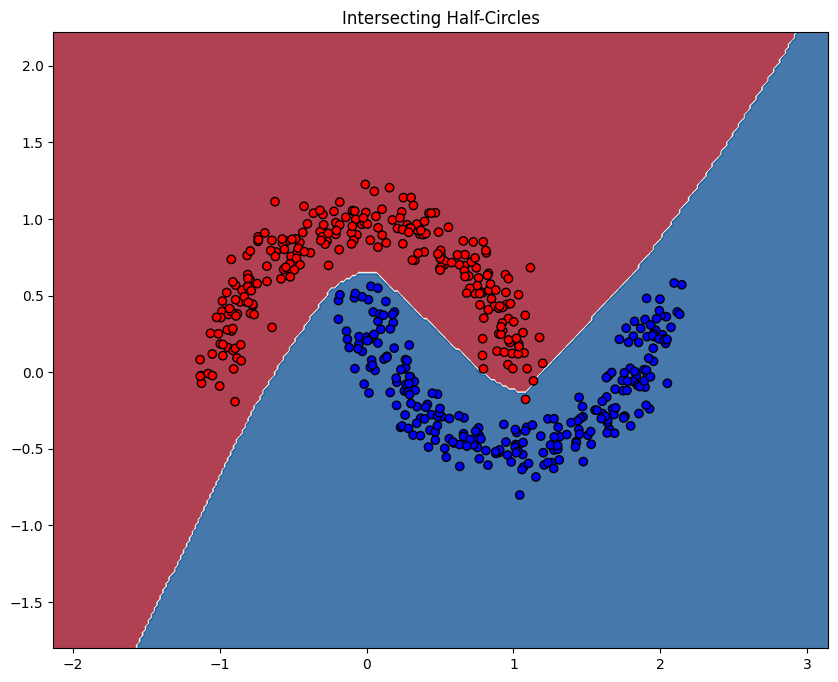

In [ ]:
from sklearn.datasets import make_moons

# Generate the dataset
X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=2000, random_state=0)
mlp.fit(df[['x', 'y']], df['label'])

plot_data_and_decision_boundary(df, mlp, 'x', 'y', 'Intersecting Half-Circles')
